<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.shape

(156, 11)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

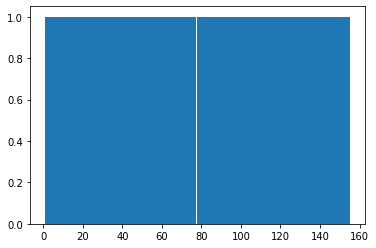

In [7]:
# Частотный график с количеством разбиений равным длинне датафрейма
plt.hist(df['Freedom'], len(df['Freedom']))
plt.show()

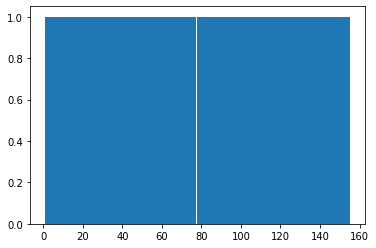

In [6]:
# Частотный график с количеством разбиений равным длинне датафрейма
plt.hist(df['Positive affect'], len(df['Positive affect']))
plt.show()

In [ ]:
# На двух графиках представлено равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
freedom = df['Freedom']

In [9]:
try:
    print('Мода: ', statistics.mode(freedom))
except:
    print('Мода: ', 'моду определить нельзя')
    
print('Медиана: ', statistics.median(freedom))
print('Математическое ожидание: ', freedom.mean())
print('Стандартное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.variance(freedom))
print('Максимум: ', max(freedom))
print('Минимум: ', min(freedom))
print('Размах: ', max(freedom) - min(freedom))

Мода:  моду определить нельзя
Медиана:  71.0
Математическое ожидание:  78.0
Стандартное отклонение:  nan
Дисперсия:  nan
Максимум:  155.0
Минимум:  1.0
Размах:  154.0


In [10]:
# Находим выброс
df[freedom.isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [11]:
# Удаляем выброс
df = df.dropna(subset=['Freedom'])
freedom = df['Freedom']
df.shape

(155, 11)

In [12]:
# Пересчитаем Стандартное отклонение и дисперсию, т.к. из-за наличия выброса это сделать не удалось
print('Стандартное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.variance(freedom))

Стандартное отклонение:  44.74371464239419
Дисперсия:  2015.0


Почему нельзя найти моду?

In [ ]:
# Моду нельзя найти, т.к. каждое значение встречается один раз

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

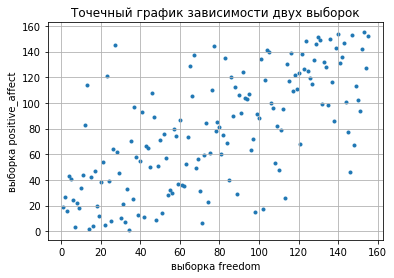

In [13]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [14]:
corr, p_value = sts.pearsonr(freedom, positive_affect)
print(corr)
# Наблюдается положительная корреляция между показателем свободы и позитивным эффектом.

0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,-0.948052
1,-0.935065
2,-0.974026
3,-0.922078
4,-0.766234


Построить матрицу корреляций для всех колонок таблицы

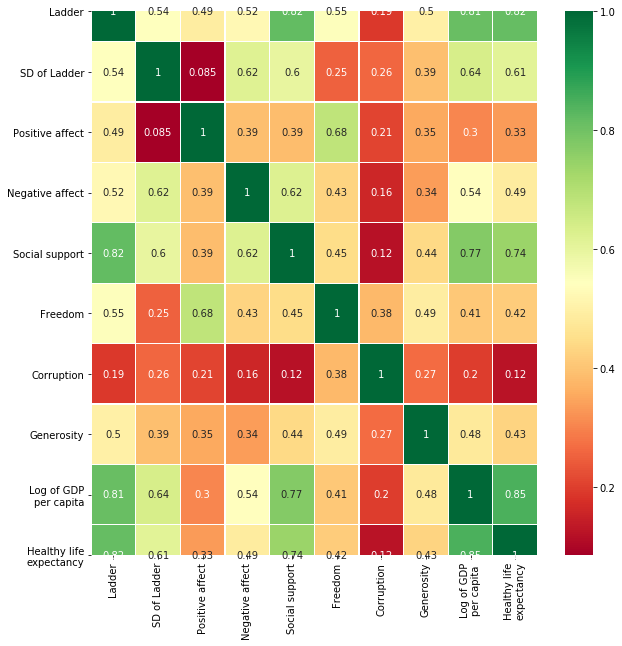

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [17]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

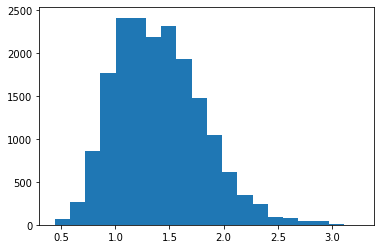

In [18]:
plt.hist(df['AveragePrice'], 20)
plt.show()
#Распределение близко к нормальному

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [19]:
df[['4046','4225','4770','AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


In [20]:
# Данные в колонках между собой 4046, 4046, 4046 имеют сильную положительную корреляцию. 
# При этом данные в колонке AveragePrice имеют слабую отрицательную корреляцию с этими 3 колонками 